# Group Final Report
# 
###  Kai Duan, Lavanya Kandhari, Panle Li, Zidong Zhou
### Group 20
## Introduction


The selected dataset for the STAT 301 project is the Heart Diseases Dataset from Kaggle and it can be found [HERE](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)
![Heart](https://c8y.doxcdn.com/image/upload/c_fill,fl_progressive,h_800,q_auto,w_1600/gau2taystiugaa2br7zs.webp)

In [109]:
# install.packages("corrplot")
# install.packages("GGally")
# install.packages("tidymodels")
# install.packages("car")
# install.packages("glmnet")
# install.packages("caret")
# install.packages("pROC")

In [110]:
library(corrplot)
library(glmnet)
library(tidymodels)
library(tidyverse)
library(readr)
library(GGally)
library(gridExtra)
library(pROC)

Some of these packages were installed through the code below. In case a library above is not found, 
please refer to the code block below to download all necessary packages!

### Data:
Heart disease is a leading cause of mortality worldwide, and early diagnosis and risk assessment are important for effective management and prevention. This dataset contains information related to heart disease diagnosis from 1988 and consists of Cleveland databases. It contains various clinical and demographic attributes of patients, for example, age, gender, cholesterol levels, and resting blood pressure results along with the “target” variable indicating the presence or absence of heart disease.
We will now explore the key objectives of the data to know more about it :



- We have a total number of 1025 observations, out of which 302 are unique
- We have 14 variables, out of which "target" is the response varibale and the rest are predictors
- The dataset that we will be using features 14 attributes of patients that will be examined to determine which are possible indicators of heart disease: 
    - age: age (continuous)
    - sex: binary , 1 = male; 0 = female (will be used as a categorical variable)
    - cp: chest pain type, 4 values 0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic (will be used as a categorical variable)
    - trestbps: resting blood pressure (in mm Hg on admission to the hospital)(continuous, double)
    - chol: serum cholesterol in mg/dl (continuous)
    - fbs: fasting blood sugar > 120 mg/dl binary 1 = true; 0 = false (will be used as a categorical variable)
    - restecg: resting electrocardiographic results 0: normal; 1: having ST-T wave abnormality ; 2: showing probable or definite left ventricular hypertrophy by Estes' criteria (will be used as a categorical variable)
    - thalach: maximum heart rate achieved (continuous)
    - exang: exercise induced angina, 1 = yes; 0 = no (will be used as a categorical variable)
    - oldpeak: ST depression induced by exercise relative to rest (continuous, double)
    - slope: the slope of the peak exercise ST segment 0: upsloping; 1: flat; 2: downsloping (will be used as a categorical variable)
    - ca: number of major vessels (0-3) colored by flourosopy (continuous)
    - thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (will be used as a categorical variable)
    - target: resting electrocardiographic results (values 0,1) (response variable)

This dataset has been collected by the cleveland clinical foundation, little is known about the origin but it is known that this research has been used by ML researchers to date for modelling related to heart diseases. 

### Question
Research Question: **Determine the possible numeric indicators of heart disease which will then be used to predict the presence of heart disease in patients**
    
Response Variable: Taget (1=no disease, 0 = disease)  
Explanatory Variables: age, cholesterol levels, trestbps,restecg,slope,cp

Since the data set contains all those explanatory variables, we need to first do inference, which is exploring which variable is significant to the response variable. Secondly, we need to build a model to do prediction, and those explantory variables that are significant must considered into model to get higher accuacy.

## Methods and Results
### EDA
#### Reading the data from the web:

In [111]:
heart <- read.csv("https://raw.githubusercontent.com/lavanyakandhari/Stat301-project/main/heart.csv")
head(heart)
heart_data <- (unique(heart))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [112]:
cat("dimentions of our dataset are:", dim(heart_data))

dimentions of our dataset are: 302 14


#### Data Cleaning and Wrangling

In [113]:
colnames(heart_data)[3] = "chestpain"
colnames(heart_data)[8] = "max_hrate"
colnames(heart_data)[10] = "st_depression_ind"
colnames(heart_data)[12] = "num_vessels"

#Convert integer columns representing categorical data to factors
heart_data$sex <- as.factor(heart_data$sex)
heart_data$cp <- as.factor(heart_data$chestpain)
heart_data$fbs <- as.factor(heart_data$fbs)
heart_data$restecg <- as.factor(heart_data$restecg)
heart_data$exang <- as.factor(heart_data$exang)
heart_data$slope <- as.factor(heart_data$slope)
heart_data$ca <- as.factor(heart_data$num_vessels)
heart_data$thal <- as.factor(heart_data$thal)
heart_data$target <- as.factor(heart_data$target)

#remove rows that contains NA.
data_tidy <- heart_data %>%
   drop_na()


#### Visualizations
We will conduct visualizations between each explantory variable and use color to distinguish the heart disease presence. We have to do this to avoid multicolinarity, if some of the explantory varibale are highly correlated, it may afftet the model we build after. Also, we can see the relation between heart diseases presence with each explantory vairiable.

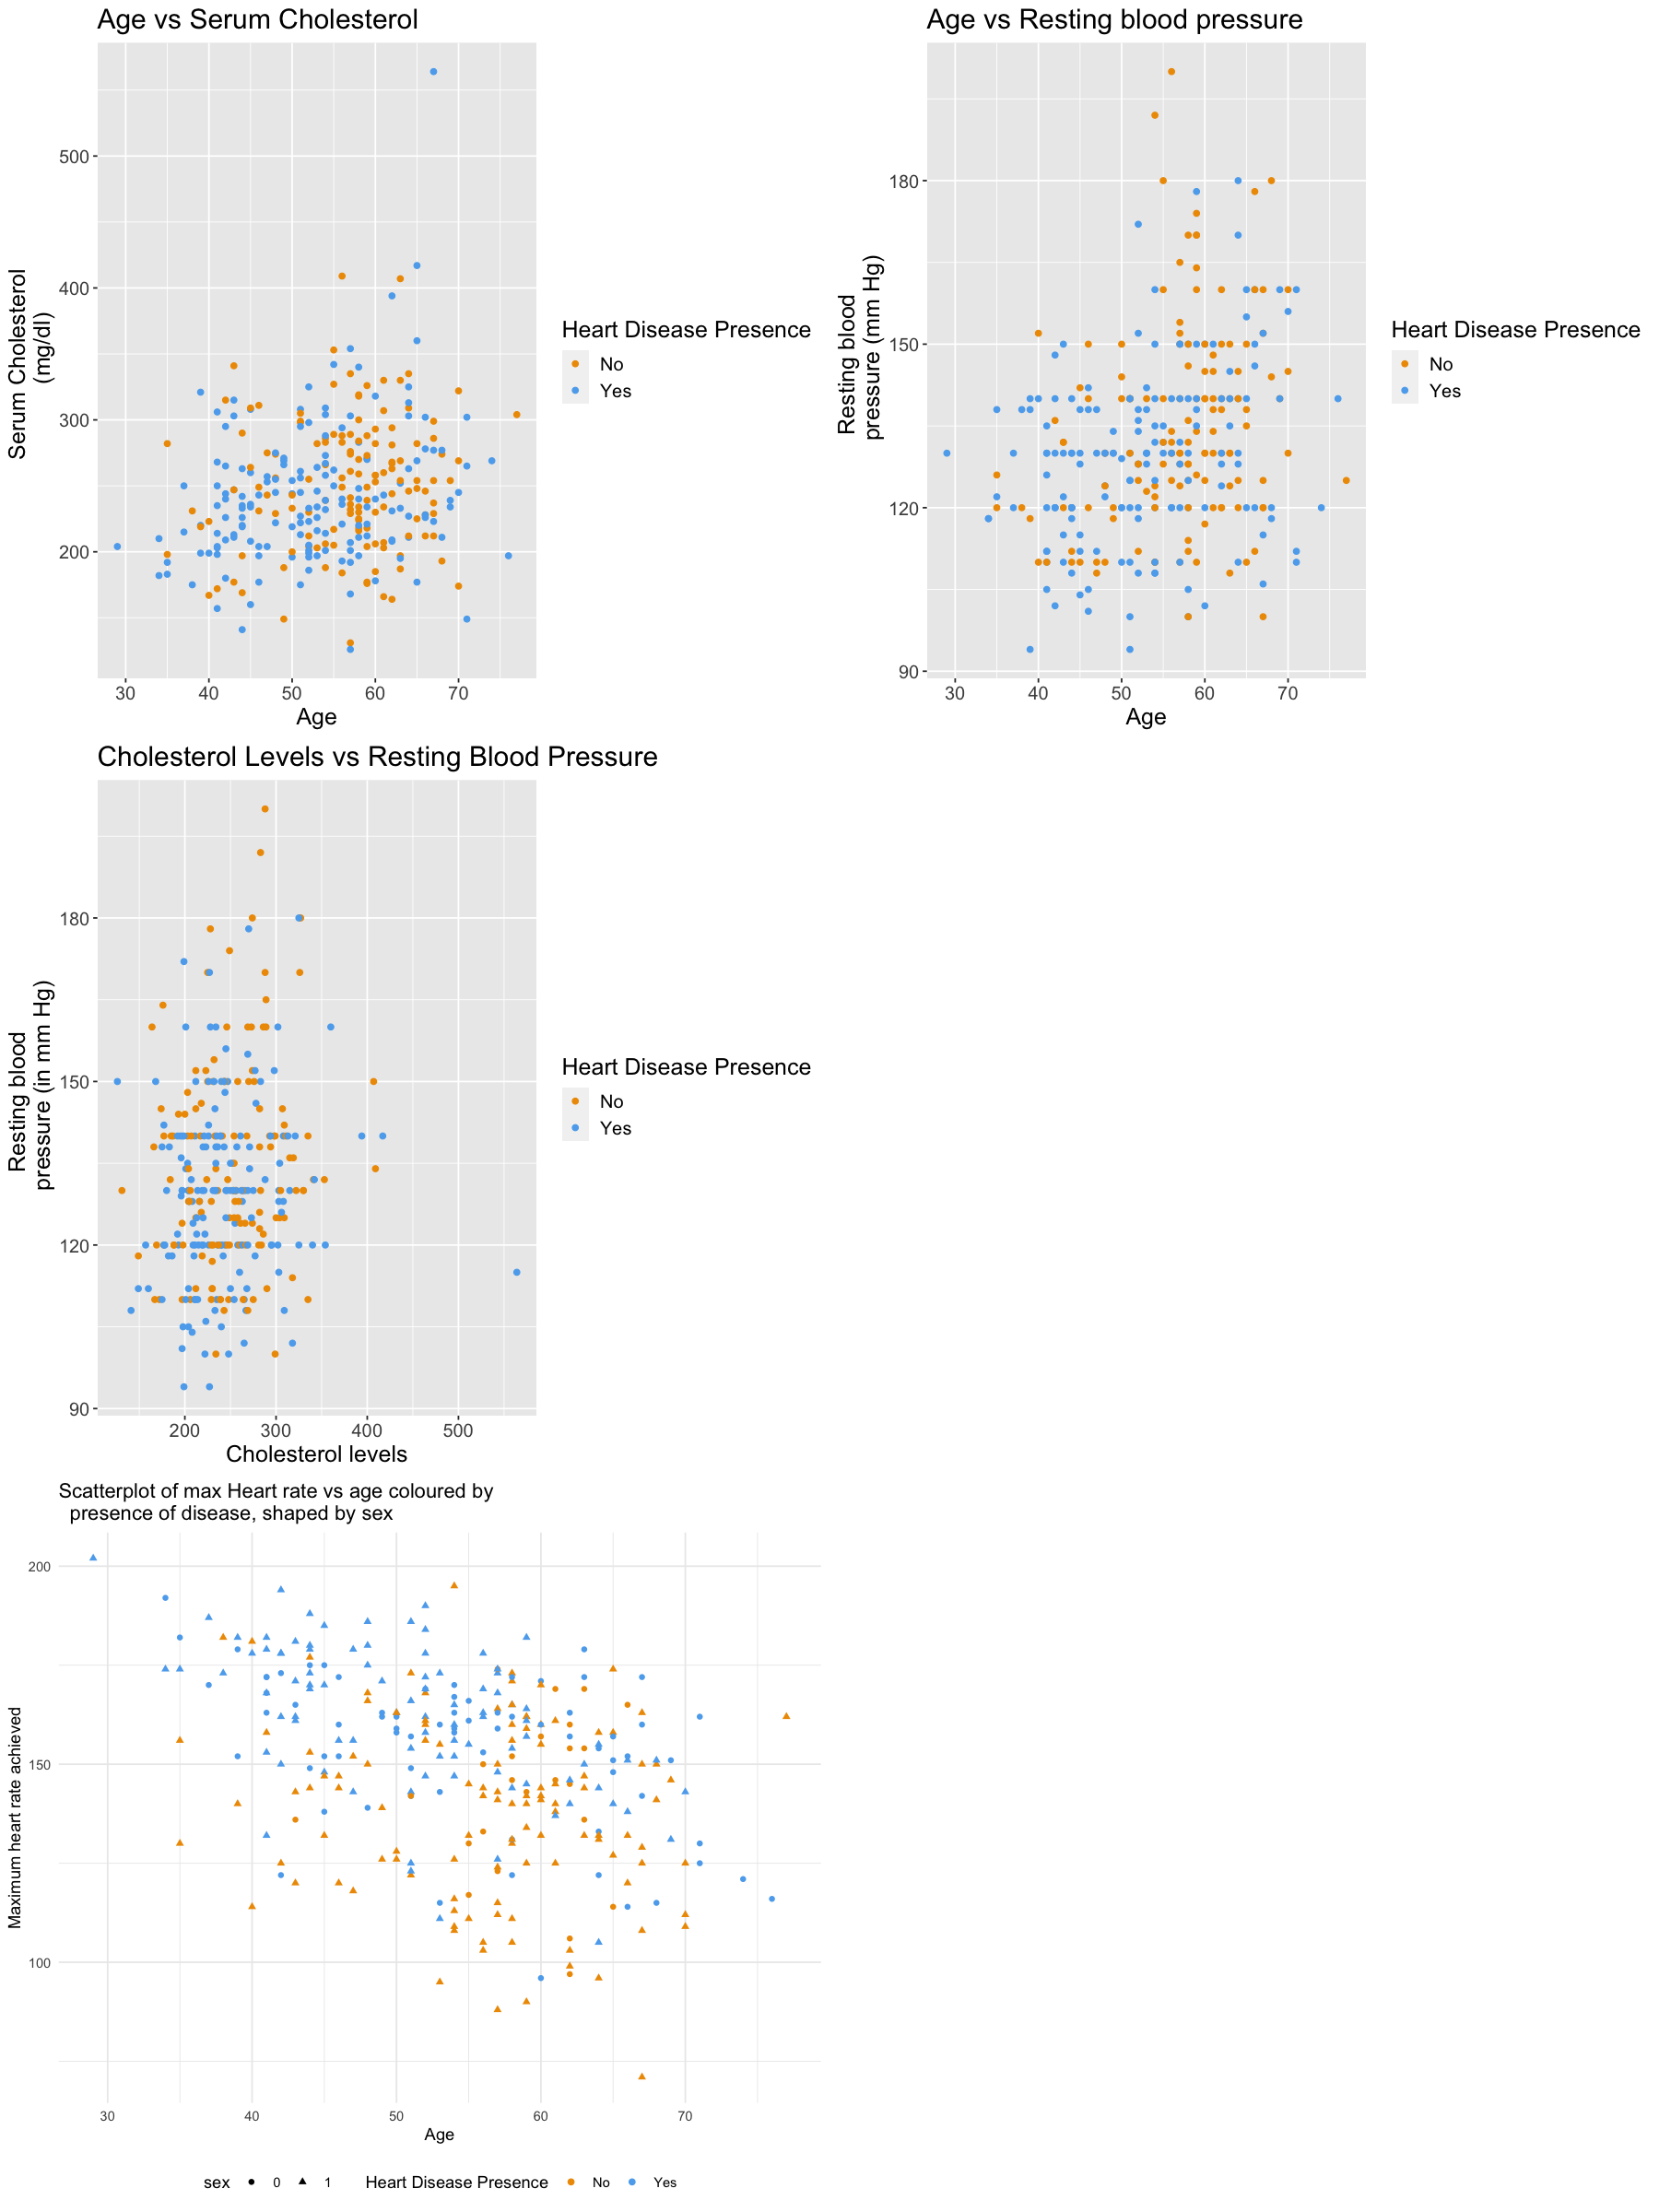

In [114]:
#relation between age, cholesterol levels
age_vs_chol <- data_tidy %>% 
    ggplot(aes(x = age, y = chol , col = target )) +
    geom_point() +
    ggtitle("Age vs Serum Cholesterol") +
    labs(x = "Age", y = "Serum Cholesterol \
    (mg/dl)", col = "Heart Disease Presence") +
    theme(text = element_text(size = 15)) +
    scale_color_manual(labels = c("No", "Yes"), 
     values = c("orange2", "steelblue2"))
#relation between age, resting blood pressure
age_vs_trestbps <- data_tidy %>% 
    ggplot(aes(x = age, y = trestbps , col = target )) +
    geom_point() +
    ggtitle("Age vs Resting blood pressure") +
    labs(x = "Age", y = "Resting blood \
    pressure (mm Hg)", col = "Heart Disease Presence") +
    theme(text = element_text(size = 15)) +
    scale_color_manual(labels = c("No", "Yes"), 
     values = c("orange2", "steelblue2"))
#relation between cholesterol levels, resting blood pressure
chol_vs_trestbps <- data_tidy %>% 
    ggplot(aes(x = chol, y = trestbps , col = target )) +
    geom_point() +
    ggtitle("Cholesterol Levels vs Resting Blood Pressure ") +
    labs(x = "Cholesterol levels", y = "Resting blood \
    pressure (in mm Hg)", col = "Heart Disease Presence") +
    theme(text = element_text(size = 15)) +
    scale_color_manual(labels = c("No", "Yes"), 
     values = c("orange2", "steelblue2"))

#relation between max Heart rate vs age coloured by presence of disease, shaped by sex
hr_vs_age <- ggplot(heart_data, aes(x = age,
                       y = max_hrate, col=target)) +
  geom_point(aes(shape = sex)) +
  labs(x = "Age", y = "Maximum heart rate achieved",
   col = "Heart Disease Presence")+
  ggtitle("Scatterplot of max Heart rate vs age coloured by 
  presence of disease, shaped by sex ") +
  theme_minimal() +
  theme(legend.position = "bottom")+
  scale_color_manual(labels = c("No", "Yes"), 
     values = c("orange2", "steelblue2"))

#combine the graphs
combined_plot<-grid.arrange(age_vs_chol, age_vs_trestbps, chol_vs_trestbps,{},hr_vs_age,{}, ncol = 2)



### Methods: Plan

##### Data Preparation and Splitting: 
The initial dataset is split into training and testing sets using a 60/40 split ratio (initial_split). The response variable (target) is transformed to ensure it represents a binary outcome by mapping the values. This is essential for logistic regression, where the response variable should be binary.

##### The test data:
The test data used for prediction is derived from the initial dataset, which was split into training and testing sets. The transformed data_test retains the same predictor variables as the training set but is utilized for evaluating the models' predictive performance.

In [115]:
data_split <- initial_split(heart_data, prop = 0.6)
data_train <- training(data_split)
data_test <- testing(data_split)

##### Fitting the Full Model: 
A logistic regression model (full_model) is built using the glm function, where the response variable is predicted by explanatory variables such as age, cholesterol levels (chol), resting blood pressure (trestbps), maximum heart rate achieved (thalach), and old peak (oldpeak). This step aims to create a baseline logistic regression model for comparison.

In [116]:
full_model <- glm(target ~ age+trestbps + chol + max_hrate + st_depression_ind, 
                  data = data_train, family = binomial)

##### Evaluation of the Full Model: 
The model's performance is assessed using the Area Under the ROC Curve (AUC) metric (roc, auc) on the test data (data_test). AUC measures the model's ability to discriminate between classes, which, in this case, is the presence or absence of heart disease.

In [117]:
predictions <- predict(full_model, data_test, type = "response")
roc_full <- roc(data_test$target, predictions)
auc_full <- auc(roc_full)
print(auc_full)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7578


##### Feature Selection using LASSO: 
LASSO regression (glmnet) is employed to perform feature selection and regularization on the dataset. LASSO introduces bias by shrinking some coefficients to zero, effectively performing variable selection by penalizing less important variables (alpha = 1 represents LASSO regression). Cross-validation (cv.glmnet) is utilized to select the best lambda value (best_lambda) for the LASSO model.

In [118]:
x_train <- model.matrix(target ~ age+trestbps + chol + max_hrate + st_depression_ind, data_train)[,-1]
y_train <- data_train$target

x_test <- model.matrix(target ~ age+trestbps + chol + max_hrate + st_depression_ind, data_test)[,-1]
y_test <- data_test$target

lasso_model <- glmnet(x_train, y_train, family = "binomial", alpha = 1)

set.seed(123)
cv_model <- cv.glmnet(x_train, y_train, family = "binomial", alpha = 1)
best_lambda <- cv_model$lambda.min

##### Evaluation of LASSO Model: 
Similar to the full model, the performance of the LASSO model is evaluated using AUC on the test data. Predictions are made using the selected LASSO model (predict, roc, auc).

In [119]:
lasso_predictions <- predict(lasso_model, s = best_lambda, newx = x_test, type = "response")
roc_lasso <- roc(y_test, lasso_predictions)
auc_lasso <- auc(roc_lasso)
print(auc_lasso)

Setting levels: control = 0, case = 1

Warning message in roc.default(y_test, lasso_predictions):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



Area under the curve: 0.7697


##### Comparison of Models: 
Coefficients from the full model and LASSO model at the best lambda are extracted and combined into a comparison table. This table illustrates the differences in coefficient estimates between the two models, highlighting the variables and their coefficients retained or altered by LASSO regularization.

In [120]:
# Extract coefficients from the full model
full_model_coef <- coef(full_model)

# Extract coefficients from the LASSO model at the best lambda
best_lambda <- cv_model$lambda.min
lasso_model_coef <- as.matrix(coef(lasso_model, s = best_lambda))

# Combine into a data frame
comparison_table <- data.frame(
  Full_Model = full_model_coef,
  LASSO_Model = lasso_model_coef
)

# Print the comparison table
print(comparison_table)
print(paste("auc_full:", round(auc_full, 4)))
print(paste("auc_lasso:", round(auc_lasso, 4)))

                    Full_Model          s1
(Intercept)       -3.292063161 -2.45559856
age                0.026194684  0.00000000
trestbps          -0.011995178  0.00000000
chol              -0.003038183  0.00000000
max_hrate          0.036701868  0.02362427
st_depression_ind -0.893489830 -0.68267588
[1] "auc_full: 0.7578"
[1] "auc_lasso: 0.7697"
